# Understanding Sophasticated Image with CNN

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-09-09 07:37:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   222MB/s    in 0.3s    

2020-09-09 07:37:54 (222 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip =  '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip,'r')

zip_ref.extractall('/tmp')

zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [5]:
train_cat_fname = os.listdir(train_cats_dir)
train_dog_fname = os.listdir(train_dogs_dir)

print(train_cat_fname[:10])
print(train_dog_fname[:10])

['cat.519.jpg', 'cat.254.jpg', 'cat.743.jpg', 'cat.647.jpg', 'cat.203.jpg', 'cat.358.jpg', 'cat.194.jpg', 'cat.271.jpg', 'cat.250.jpg', 'cat.489.jpg']
['dog.294.jpg', 'dog.320.jpg', 'dog.480.jpg', 'dog.960.jpg', 'dog.506.jpg', 'dog.129.jpg', 'dog.220.jpg', 'dog.137.jpg', 'dog.468.jpg', 'dog.909.jpg']


In [6]:
print('Total training cat images:',len(os.listdir(train_cats_dir)))
print('Total training dog images:',len(os.listdir(train_dogs_dir)))

print('Total validation cat images:',len(os.listdir(validation_cats_dir)))
print('Total validation dog images:',len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


In [7]:
%matplotlib inline 

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

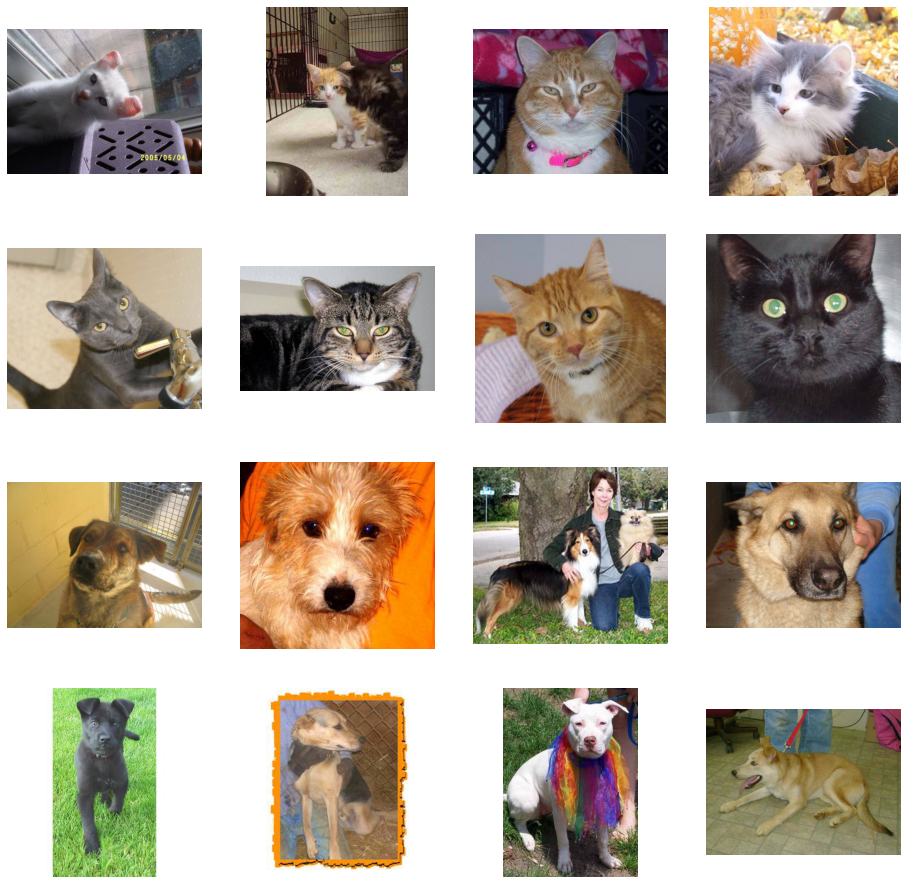

In [8]:
fig = plt.gcf()     # gcf is get current figure.

fig.set_size_inches(ncols*4,nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir,fname)
                for fname in train_cat_fname[pic_index-8:pic_index]
                ]


next_dog_pix = [os.path.join(train_dogs_dir,fname)
                for fname in train_dog_fname[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building the model

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer= RMSprop(lr=0.001),
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# Data Preprocessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size= (150,150))


validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size= (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator,
                    validation_data= validation_generator,
                    steps_per_epoch=100,
                    epochs= 15,
                    validation_steps= 50,
                    verbose=2)

Epoch 1/15
100/100 - 57s - loss: 0.7676 - accuracy: 0.5585 - val_loss: 0.6144 - val_accuracy: 0.6910
Epoch 2/15
100/100 - 56s - loss: 0.6203 - accuracy: 0.6690 - val_loss: 0.7314 - val_accuracy: 0.5770
Epoch 3/15
100/100 - 57s - loss: 0.5462 - accuracy: 0.7355 - val_loss: 0.5786 - val_accuracy: 0.6990
Epoch 4/15
100/100 - 56s - loss: 0.4680 - accuracy: 0.7745 - val_loss: 0.5818 - val_accuracy: 0.7170
Epoch 5/15
100/100 - 57s - loss: 0.3993 - accuracy: 0.8150 - val_loss: 0.6690 - val_accuracy: 0.7150
Epoch 6/15
100/100 - 56s - loss: 0.3130 - accuracy: 0.8665 - val_loss: 0.6093 - val_accuracy: 0.7320
Epoch 7/15
100/100 - 56s - loss: 0.2344 - accuracy: 0.9025 - val_loss: 0.7207 - val_accuracy: 0.7390
Epoch 8/15
100/100 - 56s - loss: 0.1713 - accuracy: 0.9345 - val_loss: 0.9481 - val_accuracy: 0.7200
Epoch 9/15
100/100 - 57s - loss: 0.1155 - accuracy: 0.9590 - val_loss: 0.8005 - val_accuracy: 0.7220
Epoch 10/15
100/100 - 57s - loss: 0.0831 - accuracy: 0.9720 - val_loss: 1.0589 - val_accura

Text(0.5, 1.0, 'Training and Validation loss')

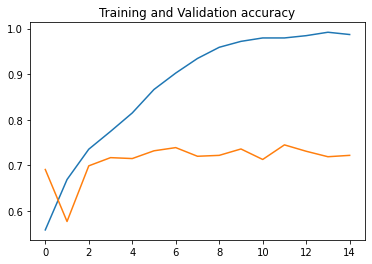

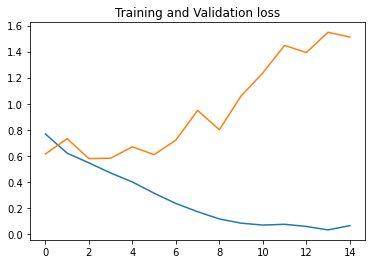

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training and Validation loss')